In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [30]:
df=pd.read_csv('heart_disease_data.csv')
df.drop('PatientID',axis=1,inplace=True)
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,Male,Asymptomatic,131,287,1,LVH,69,No,0.0,Up,1
1,57,Male,Atypical,147,156,1,ST,187,Yes,2.3,Up,1
2,43,Male,Non-anginal,101,119,1,ST,158,No,3.4,Up,1
3,71,Female,Typical,92,372,1,LVH,171,Yes,2.9,Up,1
4,36,Female,Non-anginal,107,218,0,LVH,119,No,5.2,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,Female,Non-anginal,110,261,1,LVH,129,Yes,3.7,Up,1
796,45,Female,Atypical,163,199,0,ST,103,Yes,1.8,Down,1
797,76,Female,Asymptomatic,127,240,0,ST,145,Yes,5.4,Up,0
798,75,Female,Atypical,135,182,1,Normal,78,Yes,3.8,Flat,1


In [31]:
for i in df.select_dtypes(include="object").columns:
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,1,0,131,287,1,0,69,0,0.0,2,1
1,57,1,1,147,156,1,2,187,1,2.3,2,1
2,43,1,2,101,119,1,2,158,0,3.4,2,1
3,71,0,3,92,372,1,0,171,1,2.9,2,1
4,36,0,2,107,218,0,0,119,0,5.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,0,2,110,261,1,0,129,1,3.7,2,1
796,45,0,1,163,199,0,2,103,1,1.8,0,1
797,76,0,0,127,240,0,2,145,1,5.4,2,0
798,75,0,1,135,182,1,1,78,1,3.8,1,1


In [32]:
x=df[["FastingBS","RestingBP"]]
y=df["HeartDisease"]

In [33]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 1.03046381, -0.05235162],
       [ 1.03046381,  0.55025696],
       [ 1.03046381, -1.18224271],
       ...,
       [-0.97043679, -0.20300377],
       [ 1.03046381,  0.09830052],
       [-0.97043679, -1.483547  ]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

accuracy for kernal linear:61.88%


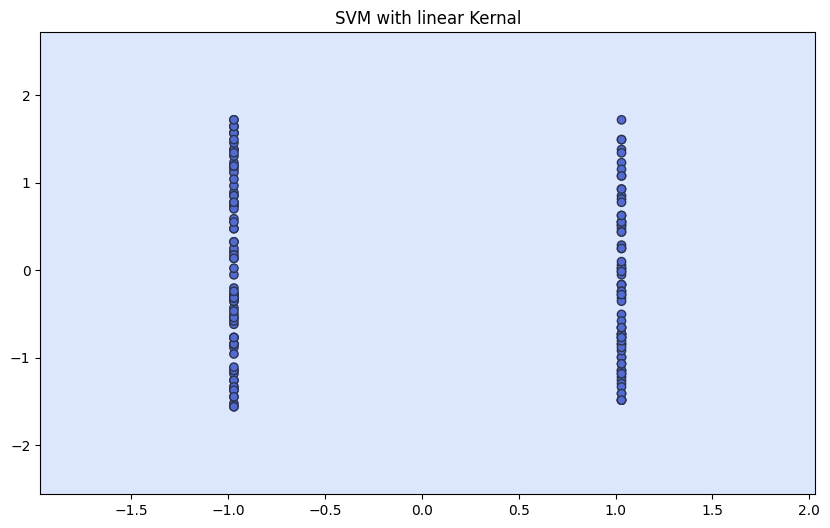

accuracy for kernal poly:61.88%


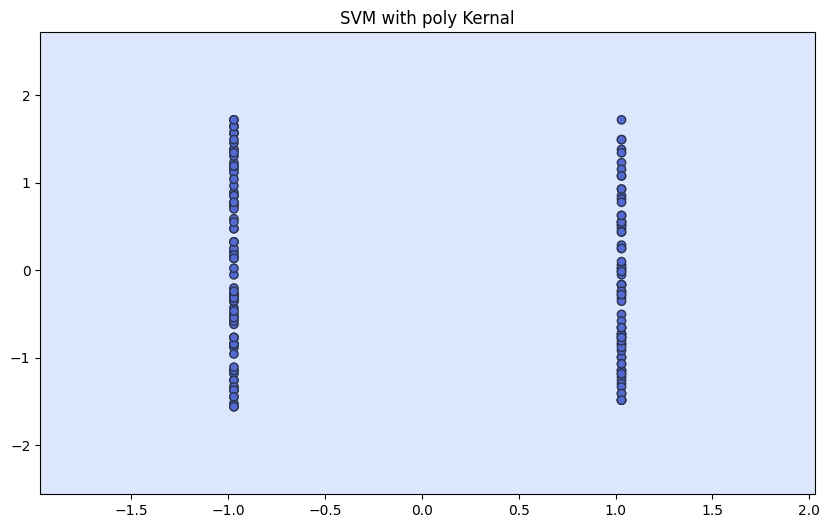

accuracy for kernal rbf:58.13%


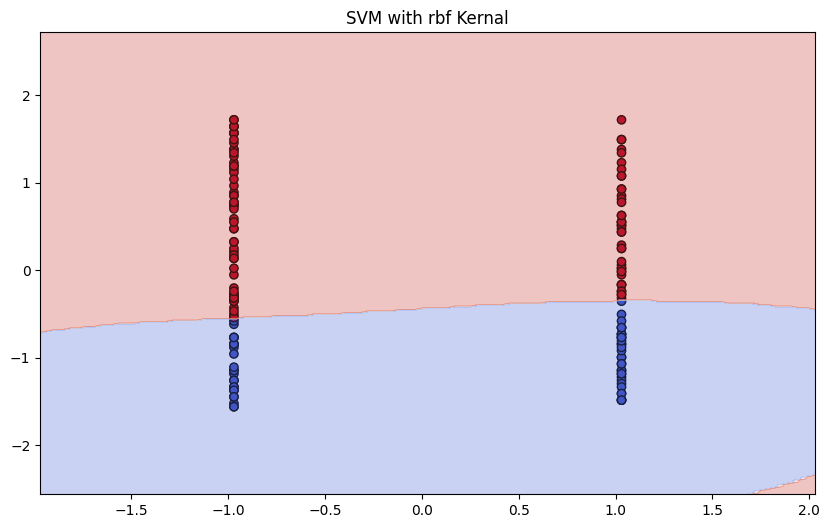

accuracy for kernal sigmoid:63.12%


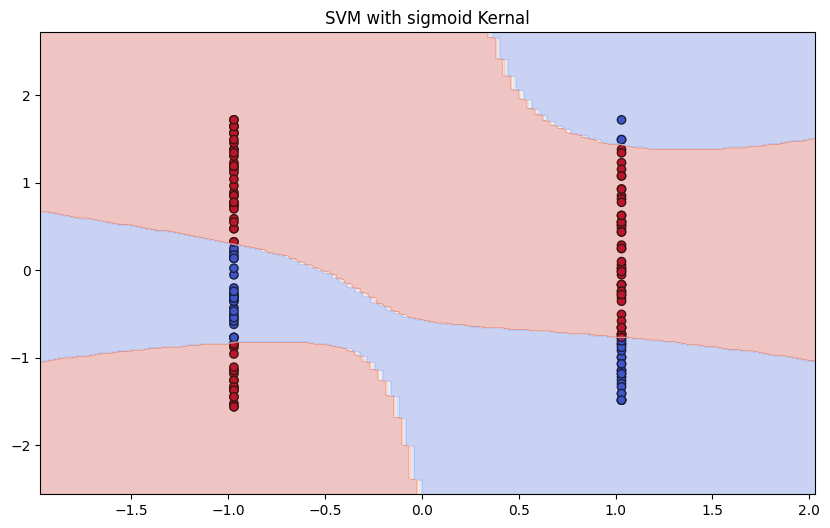

In [35]:
kernal=['linear','poly','rbf','sigmoid']
for i in kernal:
  model=SVC(kernel=i,degree=3,gamma="auto")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"accuracy for kernal {i}:{accuracy*100:.2f}%")
  plt.figure(figsize=(10,6))
  plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='coolwarm',edgecolors='k')
  x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
  y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,300))
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3,cmap='coolwarm')
  plt.title(f'SVM with {i} Kernal')

  plt.show()

In [36]:
new_data=pd.DataFrame({"FastingBS":[1],"RestingBP":[160]})
predict=model.predict(scalar.transform(new_data))
predict

array([1])